<IPython.core.display.Javascript object>


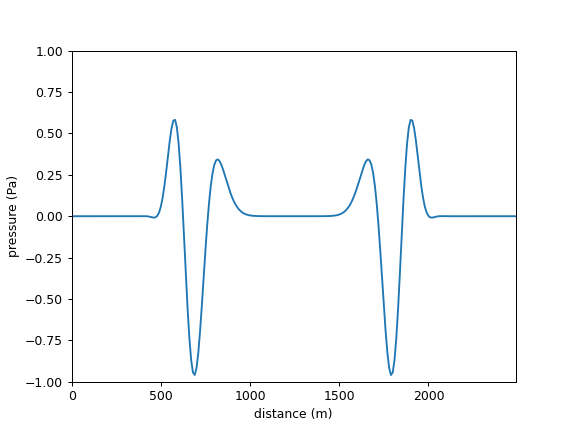

In [16]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# PARAMETERS
Nx = 250  # No of grids in x direction
dx = 10   # grid increment
x = np.arange(0, Nx * dx, dx)

# SOURCE
SRCNX = 1            # source position
SRCNY = Nx // 2
T = 1000             # total time
dt = 0.001           # time increment
f = 10               # frequency of source
t0 = 0.1             # source term

# MODEL
c = 3000             # velocity
r = 2300             # density
const1 = r * (c**2) / dx  # constant used in time updation
const2 = 1.0 / (dx * r)   # constant used in time updation

# FIELD VARIABLES
p0 = np.zeros(Nx)  # initialize field variables for pressure
p2 = np.zeros(Nx)
v0 = np.zeros(Nx)  # initialize field variables for velocity
v2 = np.zeros(Nx)

# Ricker wavelet source function
def ricker(f, t, t0):
    return (1 - 2.0 * (np.pi**2) * (f**2) * (t - t0)**2) * (np.exp(-((np.pi**2) * (f**2) * (t - t0)**2)))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
line, = ax.plot(x, p2)
ax.set_xlabel('distance (m)')
ax.set_ylabel('pressure (Pa)')
ax.set_xlim(min(x), max(x))
ax.set_ylim(-1, 1)

# Function to update the plot for each frame
def update(k):
    t = k * dt

    for i in range(2, Nx - 2):
        v2[i] = dt * ((v0[i] * (1 / dt)) - (const2 * (p0[i + 1] - p0[i])))
        p2[i] = dt * ((p0[i] * (1 / dt)) - (const1 * (v2[i] - v2[i - 1])))

    # Use the Ricker wavelet source function
    source_value = ricker(f, t, t0)
    p2[SRCNY] = source_value

    p0[:] = p2[:]
    v0[:] = v2[:]

    p0[1] = 0
    p2[1] = 0

    line.set_ydata(p2)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=int(T/dt), blit=True, interval=10)

plt.show()
